In [122]:
from hashlib import sha256 as h
import matplotlib.pyplot as plt
import random as r
import numpy as np

In [113]:
def get_hash() -> str:
   s = ''
   for i in range(50): 
      s += chr(r.randint(97,123))
   return h(s.encode()).hexdigest()

dp = {}
def get_last_n_bits(s: str, b: int) -> str:
   bitmap = {'0':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, 'a':10, 'b':11, 'c':12, 'd':13, 'e':14, 'f':15}
   bits = ''

   key = (s[-(b//4+1):], b)
   if key in dp: return dp[key]

   for i in range(b-1, -1, -1):
      c = s[-(i//4+1)]
      bits += str((bitmap[c]>>(i%4))&1)
   
   dp[key] = bits
   
   return bits

def compare_last_n_bits(m: str, guess: str, b: int) -> bool:
   return get_last_n_bits(m, b) == get_last_n_bits(guess, b)

In [114]:
iterations = 100

avgs = []
bits = [4,8,12,16]
for b in bits:
   avg = 0
   for i in range(iterations):
      m = get_hash()
      count = 1
      while not compare_last_n_bits(m, get_hash(), b): count += 1
      avg += count
   avg /= iterations
   avgs.append((b,avg))

   print(f"Bits: {b}, avg: {round(avg, 2)}")

Bits: 4, avg: 15.65
Bits: 8, avg: 234.18
Bits: 12, avg: 4510.16
Bits: 16, avg: 49267.89


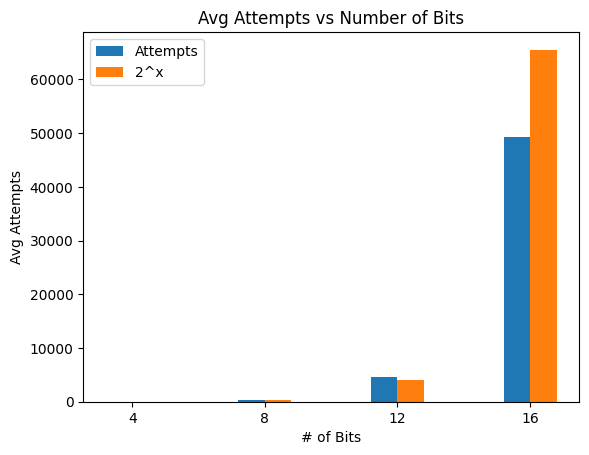

In [125]:
width = 0.8
xdata = np.array([x[0] for x in avgs])
plt.bar(xdata-width/2, [x[1] for x in avgs], width=width)
plt.bar(xdata+width/2, [2**x[0] for x in avgs], width=width)
plt.xlabel("# of Bits")
plt.ylabel("Avg Attempts")
plt.title("Avg Attempts vs Number of Bits")
plt.xticks([x[0] for x in avgs])
plt.legend(["Attempts", "2^x"])

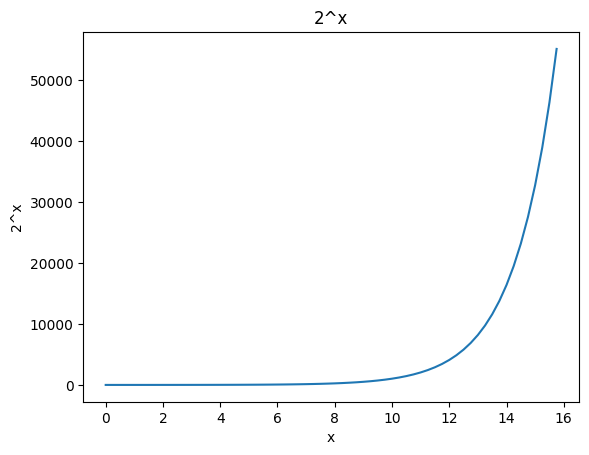

In [89]:
xData = [i/4 for i in range(16*4)]
yData = [2**i for i in xData]

plt.plot(xData, yData)
plt.title("2^x")
plt.xlabel("x")
plt.ylabel("2^x")
plt.show()